In [1]:
import numpy as np
import matplotlib.pyplot as pp;
pp.rcParams['figure.figsize'] = [10, 5]

In [2]:
def forwardeuler(f,t0,u0,T,M):
    """
    Computes an approximate solution u of a scalar ODE 

        u' = f(t,u)

    with a forward Euler method subject to u(t0) = u0.

    Parameters
    ----------

    f: The right-hand side function of (t,u).
    t0: The initial time.
    u0: The initial condition at t=t0.
    T: Endpoint of solution t-interval [t0,T]
    M: The number of equally spaced time steps.

    Returns
    -------

    t: An array of sample times.
    u: The approximate solution at the sample times.
    """

    t=np.linspace(t0,T,M+1)
    h = (T-t0)/M
    
    u = np.zeros( (M+1,) )
    u[0] = u0

    u_curr = u0
    for k in range(M):
        u_curr = u_curr + h*f(t[k],u_curr)
        u[k+1] = u_curr

    return (t,u)

In [3]:
?forwardeuler

Signature: forwardeuler(f, t0, u0, T, M)
Docstring:
Computes an approximate solution u of a scalar ODE 

    u' = f(t,u)

with a forward Euler method subject to u(t0) = u0.

Parameters
----------

f: The right-hand side function of (t,u).
t0: The initial time.
u0: The initial condition at t=t0.
T: Endpoint of solution t-interval [t0,T]
M: The number of equally spaced time steps.

Returns
-------

t: An array of sample times.
u: The approximate solution at the sample times.
File:      ~/Dropbox/Classes/F615/python/<ipython-input-2-bff7260e8cc7>
Type:      function


In [4]:
?np.zeros

Docstring:
zeros(shape, dtype=float, order='C')

Return a new array of given shape and type, filled with zeros.

Parameters
----------
shape : int or tuple of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: 'C'
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.

Returns
-------
out : ndarray
    Array of zeros with the given shape, dtype, and order.

See Also
--------
zeros_like : Return an array of zeros with shape and type of input.
empty : Return a new uninitialized array.
ones : Return a new array setting values to one.
full : Return a new array of given shape filled with value.

Examples
--------
>>> np.zeros(5)
array([ 0.,  0.,  0.,  0.,  0.])

>>> np.zeros((5,), dtype=int)
array([0, 0, 0, 0, 0])

>>> np.zeros((2, 1))
array([[ 0.],
      

In [5]:
f = lambda t, u: 10*u*(1-u)

In [6]:
def f(t,u):
    return 10*u*(1-u)

In [7]:
u_exact = lambda t : 1/(1+99*np.exp(-10*t))

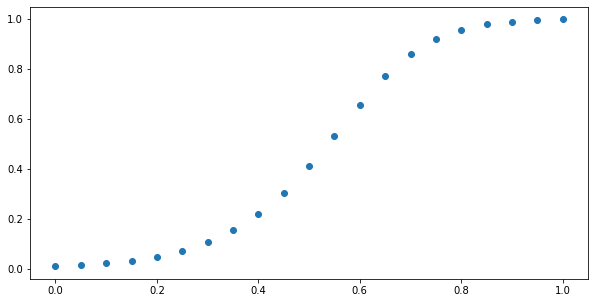

In [8]:
(t,u)=forwardeuler(f,t0=0,u0=0.01,T=1,M=20)
pp.plot(t,u,"o")

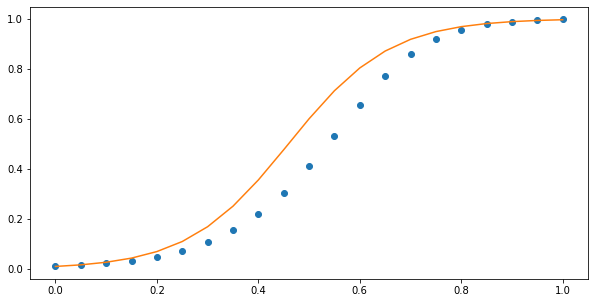

In [9]:
pp.plot(t,u,"o",t,u_exact(t))

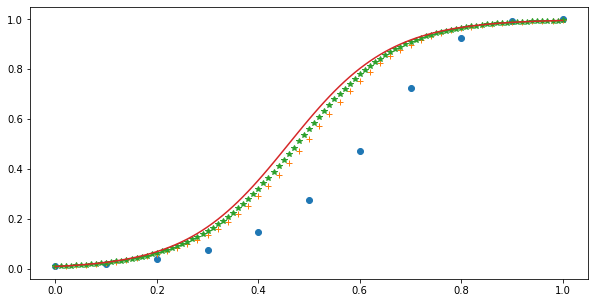

In [10]:
M_list = [10, 50, 100]
symbols = ["o","+","*"]
for (k,M) in enumerate(M_list):
    (t,u) = forwardeuler(f,t0=0,u0=0.01,T=1,M=M)
    pp.plot(t,u,symbols[k])
# Reuse last value of t for exact solution
pp.plot(t,u_exact(t))

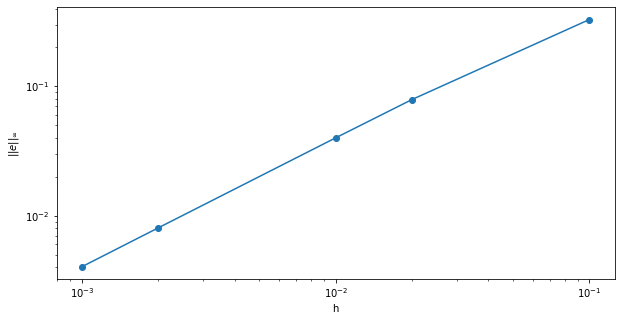

In [11]:
M_list = [10, 50, 100, 500, 1000]
err = []
for M in M_list:
    (t,u) = forwardeuler(f,t0=0,u0=0.01,T=1,M=M)
    err.append(np.linalg.norm(u_exact(t)-u,np.Inf))
err
h_list = 1.0/np.array(M_list)
pp.loglog(h_list,err,"-o")
pp.xlabel("h")
pp.ylabel(r"$||e||_{\infty}$");

In [12]:
np.polyfit(np.log(h_list),np.log(err),1)

array([0.96101403, 1.16103305])

The first entry is the fitted slope, about 1, so error goes like $C h^1$. And if we omit the first biggest step size, it's even closer to 1:

In [13]:
np.polyfit(np.log(h_list[1:]),np.log(err[1:]),1)

array([0.99394001, 1.35447687])

In [ ]:
np.zeros((5,))